## 1. Setup

In [15]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import time
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from automl.pipeline import run_pipeline
from automl.preprocessing import preprocess_data
from automl.feature_selection import select_features
from automl.model_trainer import train_models
from automl.hyperparameter_tuner import tune_hyperparameters
from automl.evaluator import evaluate_models
from automl.model_selector import select_best_model

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Setup complete!")

✅ Setup complete!


## 2. Quick Dataset Loader

In [16]:
def load_dataset(name='iris'):
    """Load a test dataset."""
    datasets = {
        'iris': load_iris,
        'wine': load_wine,
        'breast_cancer': load_breast_cancer
    }
    
    data = datasets[name]()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    
    print(f"Loaded {name} dataset")
    print(f"Shape: {df.shape}")
    print(f"Classes: {len(np.unique(data.target))}")
    
    return df

# Load default dataset
df = load_dataset('iris')
df.head()

Loaded iris dataset
Shape: (150, 5)
Classes: 3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Experiment: Compare Search Methods

2025-12-19 02:51:55,067 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:51:55,069 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:51:55,070 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:51:55,071 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:51:55,072 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:51:55,073 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:51:55,075 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:51:55,076 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:51:55,077 - automl.tabular_preprocessing - INFO - ===============================================

🔬 Experiment: Comparing hyperparameter search methods


Testing GRID search...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model decision_tree: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model random_forest: F1-weighted=0.9666, A

2025-12-19 02:52:08,107 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:08,110 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:08,112 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:08,114 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:08,116 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:08,118 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:08,119 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:08,121 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:52:08,123 - automl.tabular_preprocessing - INFO - ===============================================

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-val score (accuracy): 0.952381
==== AutoML Pipeline: Done ====
✅ grid completed in 13.04s

Testing RANDOM search...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333

2025-12-19 02:52:19,864 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:19,864 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:19,865 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:19,865 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:19,866 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:19,867 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:19,867 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:19,868 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:52:19,869 - automl.tabular_preprocessing - INFO - ===============================================

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-val score (accuracy): 0.952381
==== AutoML Pipeline: Done ====
✅ random completed in 11.76s

Testing BAYESIAN search...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier


[I 2025-12-19 02:52:22,086] A new study created in memory with name: no-name-b57505ae-55f6-4e7b-b1fb-419e56cedf26


Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model decision_tree: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model random_forest: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model svc: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model knn: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model gradient_boosting: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Selected best model: random_forest. Reason: Highest weighted F1 (0.9666); tie-broken by accuracy (0.9667) and precision (0.9697).
Tuning hyperparameters for selected model...
Hyperparameter tuning method: bayesian


[I 2025-12-19 02:52:22,591] Trial 0 finished with value: 0.9523809523809524 and parameters: {'idx_n_estimators': 1, 'idx_max_depth': 2, 'idx_min_samples_split': 1, 'idx_min_samples_leaf': 1}. Best is trial 0 with value: 0.9523809523809524.
[I 2025-12-19 02:52:23,644] Trial 1 finished with value: 0.9333333333333332 and parameters: {'idx_n_estimators': 2, 'idx_max_depth': 0, 'idx_min_samples_split': 0, 'idx_min_samples_leaf': 0}. Best is trial 0 with value: 0.9523809523809524.
[I 2025-12-19 02:52:23,890] Trial 2 finished with value: 0.9523809523809524 and parameters: {'idx_n_estimators': 0, 'idx_max_depth': 2, 'idx_min_samples_split': 0, 'idx_min_samples_leaf': 1}. Best is trial 0 with value: 0.9523809523809524.
[I 2025-12-19 02:52:24,917] Trial 3 finished with value: 0.9523809523809524 and parameters: {'idx_n_estimators': 2, 'idx_max_depth': 0, 'idx_min_samples_split': 1, 'idx_min_samples_leaf': 1}. Best is trial 0 with value: 0.9523809523809524.
[I 2025-12-19 02:52:25,446] Trial 4 fini

❌ bayesian failed: name 'v' is not defined

📊 Search Method Comparison Results:

Method    Best Model  Accuracy  F1-Score  Time (s)
  Grid random_forest  0.966667         0 13.038398
Random random_forest  0.966667         0 11.758003


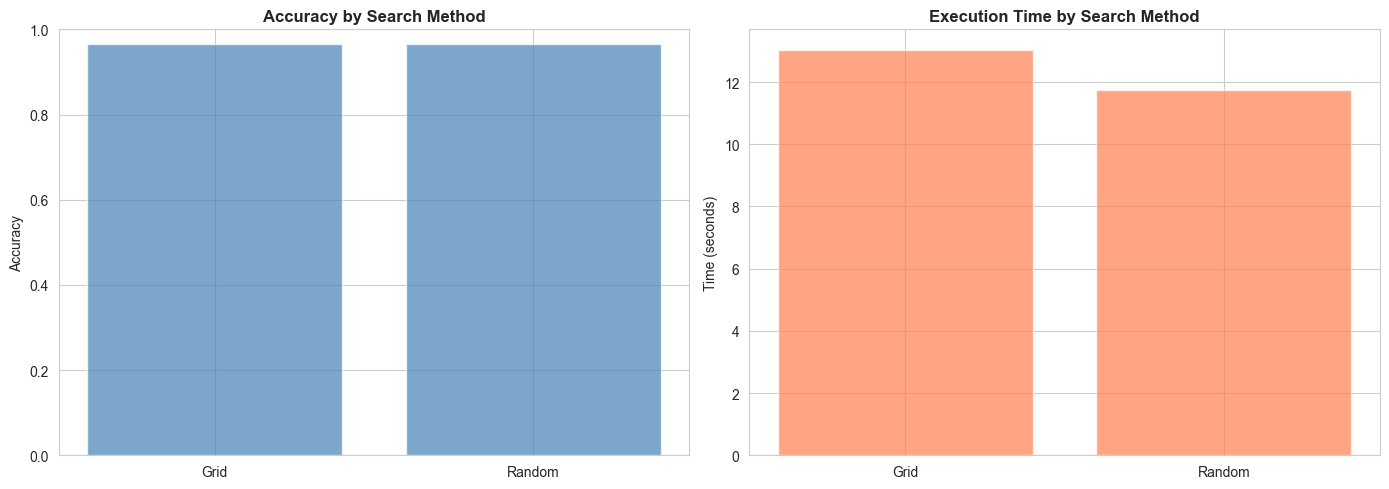

In [17]:
# Compare grid, random, and bayesian search
search_methods = ['grid', 'random', 'bayesian']
results_comparison = []

print("🔬 Experiment: Comparing hyperparameter search methods\n")
print("="*70)

for method in search_methods:
    print(f"\nTesting {method.upper()} search...")
    start_time = time.time()
    
    try:
        results = run_pipeline(
            dataset=df,
            target_column='target',
            task_type='classification',
            feature_selection_enabled=True,
            hyperparameter_tuning_enabled=True,
            # Removed invalid preprocessing override
            hyperparameter_params={'search_method': method}
        )
        
        elapsed = time.time() - start_time
        best_model = results['best_model']['name']
        best_metrics = results['evaluation_results'][best_model]['metrics']
        
        results_comparison.append({
            'Method': method.capitalize(),
            'Best Model': best_model,
            'Accuracy': best_metrics.get('accuracy', 0),
            'F1-Score': best_metrics.get('f1_score', 0),
            'Time (s)': elapsed
        })
        
        print(f"✅ {method} completed in {elapsed:.2f}s")
    except Exception as e:
        print(f"❌ {method} failed: {e}")

# Display results
print("\n" + "="*70)
print("📊 Search Method Comparison Results:\n")
comparison_df = pd.DataFrame(results_comparison)
if comparison_df.empty:
    print("No successful runs to compare.")
else:
    print(comparison_df.to_string(index=False))

# Visualize (only if we have the required columns)
required_cols = {'Method', 'Accuracy', 'Time (s)'}
if not comparison_df.empty and required_cols.issubset(set(comparison_df.columns)):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].bar(comparison_df['Method'], comparison_df['Accuracy'], alpha=0.7, color='steelblue')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy by Search Method', fontweight='bold')
    axes[0].set_ylim([0, 1])

    axes[1].bar(comparison_df['Method'], comparison_df['Time (s)'], alpha=0.7, color='coral')
    axes[1].set_ylabel('Time (seconds)')
    axes[1].set_title('Execution Time by Search Method', fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization: missing data or columns.")

## 4. Experiment: Feature Selection Impact

2025-12-19 02:52:36,329 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:36,330 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:36,331 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:36,332 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:36,332 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:36,333 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:36,334 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:36,335 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:52:36,336 - automl.tabular_preprocessing - INFO - ===============================================

🔬 Experiment: Impact of feature selection


Testing Without FS...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier


2025-12-19 02:52:37,918 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:37,919 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:37,920 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:37,921 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:37,922 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:37,923 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:37,924 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:37,925 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...


Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model decision_tree: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model random_forest: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model svc: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model knn: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model gradient_boosting: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Selected best model: svc. Reason: Highest weighted F1 (0.9666); tie-broken by accuracy (0.9667) and precision (0.9697).
==== AutoML Pipeline: Done ====
✅ Without FS completed

Testing With FS...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...


2025-12-19 02:52:37,926 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:37,929 - automl.tabular_preprocessing - INFO - ✓ Target column 'target' separated. Shape: (150,)
2025-12-19 02:52:37,931 - automl.tabular_preprocessing - INFO - 
📊 Column Detection:
2025-12-19 02:52:37,932 - automl.tabular_preprocessing - INFO -   • Numeric columns: 4
2025-12-19 02:52:37,933 - automl.tabular_preprocessing - INFO -   • Categorical columns: 0
2025-12-19 02:52:37,934 - automl.tabular_preprocessing - INFO - 
🔧 Handling Missing Values:
2025-12-19 02:52:37,936 - automl.tabular_preprocessing - INFO - 
🔤 Encoding Categorical Variables:
2025-12-19 02:52:37,939 - automl.tabular_preprocessing - INFO - 
✓ Total features after encoding: 4
2025-12-19 02:52:37,940 - automl.tabular_preprocessing - INFO - 
⚖️  Scaling Features:
2025-12-19 02:52:37,941 - automl.tabular_preprocessing - INFO -   • Using StandardScaler (mean=0, std=1)
2025-12-19 02:5

Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model decision_tree: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model random_forest: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model svc: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model knn: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697

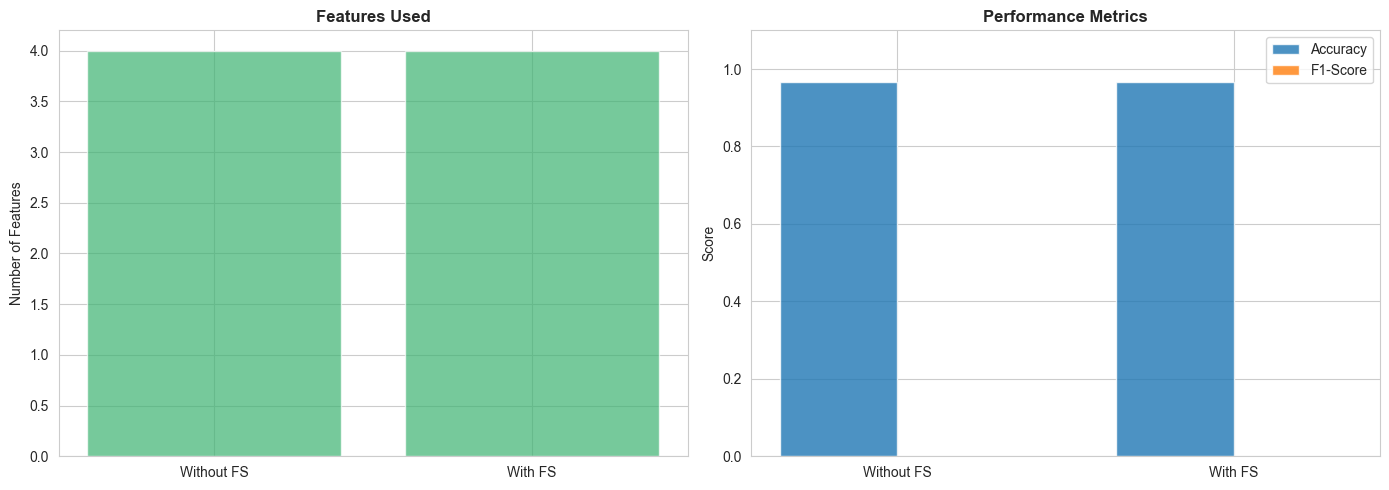

In [18]:
# Compare with and without feature selection
print("🔬 Experiment: Impact of feature selection\n")
print("="*70)

fs_results = []

for enable_fs in [False, True]:
    label = "With FS" if enable_fs else "Without FS"
    print(f"\nTesting {label}...")
    
    results = run_pipeline(
        dataset=df,
        target_column='target',
        task_type='classification',
        feature_selection_enabled=enable_fs,
        hyperparameter_tuning_enabled=False
        # Removed invalid preprocessing override
    )
    
    best_model = results['best_model']['name']
    best_metrics = results['evaluation_results'][best_model]['metrics']
    n_features = len(results.get('selected_features') or df.columns[:-1])
    
    fs_results.append({
        'Configuration': label,
        'Features Used': n_features,
        'Best Model': best_model,
        'Accuracy': best_metrics.get('accuracy', 0),
        'F1-Score': best_metrics.get('f1_score', 0)
    })
    
    print(f"✅ {label} completed")

# Display results
print("\n" + "="*70)
print("📊 Feature Selection Impact:\n")
fs_df = pd.DataFrame(fs_results)
print(fs_df.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(fs_df['Configuration'], fs_df['Features Used'], alpha=0.7, color='mediumseagreen')
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Features Used', fontweight='bold')

x = np.arange(len(fs_df))
width = 0.35
axes[1].bar(x - width/2, fs_df['Accuracy'], width, label='Accuracy', alpha=0.8)
axes[1].bar(x + width/2, fs_df['F1-Score'], width, label='F1-Score', alpha=0.8)
axes[1].set_ylabel('Score')
axes[1].set_title('Performance Metrics', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(fs_df['Configuration'])
axes[1].legend()
axes[1].set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## 5. Experiment: Dataset Size Impact

2025-12-19 02:52:41,371 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:41,372 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:41,372 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:41,373 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:41,374 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:41,375 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:41,375 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:41,376 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:52:41,377 - automl.tabular_preprocessing - INFO - ===============================================

🔬 Experiment: Impact of dataset size


Testing with 50 samples...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier


2025-12-19 02:52:43,911 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:43,912 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:43,913 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:43,914 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:43,915 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:43,916 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:43,917 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:43,917 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:52:43,918 - automl.tabular_preprocessing - INFO - ===============================================

Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.8971, Accuracy=0.9000, Precision=0.9250
Model decision_tree: F1-weighted=0.8971, Accuracy=0.9000, Precision=0.9250
Model random_forest: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model svc: F1-weighted=0.8971, Accuracy=0.9000, Precision=0.9250
Model knn: F1-weighted=0.8971, Accuracy=0.9000, Precision=0.9250
Model gradient_boosting: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Selected best model: random_forest. Reason: Highest weighted F1 (1.0000); tie-broken by accuracy (1.0000) and precision (1.0000).
==== AutoML Pipeline: Done ====
✅ Completed for size 50

Testing with 100 samples...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initia

2025-12-19 02:52:46,320 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:46,321 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 02:52:46,322 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:46,323 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 02:52:46,324 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 02:52:46,325 - automl.preprocessing - INFO - ======================================================================
2025-12-19 02:52:46,327 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 02:52:46,328 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 02:52:46,329 - automl.tabular_preprocessing - INFO - ===============================================

Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model decision_tree: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model random_forest: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model svc: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model knn: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model gradient_boosting: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Selected best model: logistic_regression. Reason: Highest weighted F1 (1.0000); tie-broken by accuracy (1.0000) and precision (1.0000).
==== AutoML Pipeline: Done ====
✅ Completed for size 100

Testing with 150 samples...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...


2025-12-19 02:52:46,356 - automl.tabular_preprocessing - INFO -   • Using StandardScaler (mean=0, std=1)
2025-12-19 02:52:46,370 - automl.tabular_preprocessing - INFO - 
✂️  Splitting Data:
2025-12-19 02:52:46,372 - automl.tabular_preprocessing - INFO -   • Test size: 20.0%
2025-12-19 02:52:46,374 - automl.tabular_preprocessing - INFO -   • Validation size: 10.0%
2025-12-19 02:52:46,391 - automl.tabular_preprocessing - INFO - 
✓ Split Complete:
2025-12-19 02:52:46,396 - automl.tabular_preprocessing - INFO -   • Train: (105, 4)
2025-12-19 02:52:46,398 - automl.tabular_preprocessing - INFO -   • Val:   (15, 4)
2025-12-19 02:52:46,403 - automl.tabular_preprocessing - INFO -   • Test:  (30, 4)
2025-12-19 02:52:46,410 - automl.tabular_preprocessing - INFO - ============================================================


Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model decision_tree: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model random_forest: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model svc: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model knn: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333

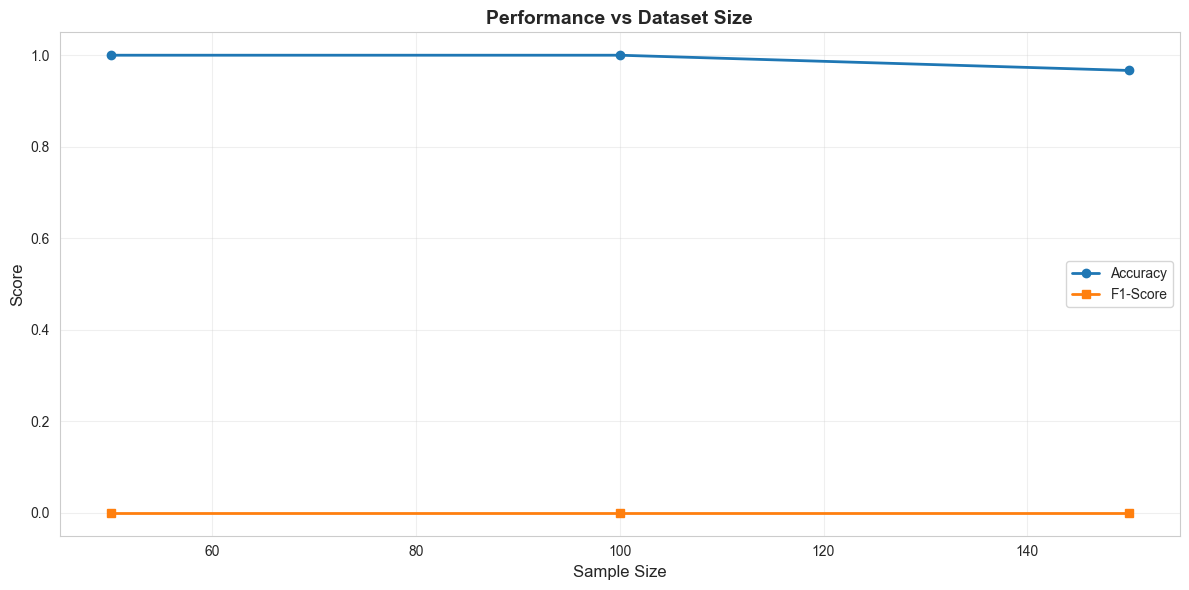

In [19]:
# Test with different dataset sizes
print("🔬 Experiment: Impact of dataset size\n")
print("="*70)

sample_sizes = [50, 100, 150]  # Different sizes
size_results = []

for size in sample_sizes:
    print(f"\nTesting with {size} samples...")
    
    df_sample = df.sample(n=min(size, len(df)), random_state=42)
    
    results = run_pipeline(
        dataset=df_sample,
        target_column='target',
        task_type='classification',
        feature_selection_enabled=True,
        hyperparameter_tuning_enabled=False
        # Removed invalid preprocessing override
    )
    
    best_model = results['best_model']['name']
    best_metrics = results['evaluation_results'][best_model]['metrics']
    
    size_results.append({
        'Sample Size': size,
        'Best Model': best_model,
        'Accuracy': best_metrics.get('accuracy', 0),
        'F1-Score': best_metrics.get('f1_score', 0)
    })
    
    print(f"✅ Completed for size {size}")

# Display results
print("\n" + "="*70)
print("📊 Dataset Size Impact:\n")
size_df = pd.DataFrame(size_results)
print(size_df.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(size_df['Sample Size'], size_df['Accuracy'], marker='o', label='Accuracy', linewidth=2)
plt.plot(size_df['Sample Size'], size_df['F1-Score'], marker='s', label='F1-Score', linewidth=2)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance vs Dataset Size', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Experiment: Manual Pipeline Steps

Test individual pipeline components separately.

In [21]:
# Step 2: Feature Selection
print("\nStep 2: Feature selection...")
fs_result = select_features(X_train, y_train, method='all')
selected_features = fs_result.get('selected_features') or []
selected_indices = fs_result.get('selected_indices')
if selected_indices:
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]
else:
    X_train_selected = X_train
    X_test_selected = X_test
print(f"✅ Selected {len(selected_features)} features")
if selected_features:
    print(f"Features: {selected_features[:5]}...")


Step 2: Feature selection...
Initial features: 4
Selected features: 2
✅ Selected 0 features


## 7. Experiment: Cross-Dataset Comparison

In [ ]:
# Compare performance across different datasets
print("🔬 Experiment: Cross-dataset comparison\n")
print("="*70)

datasets = ['iris', 'wine', 'breast_cancer']
cross_results = []

for dataset_name in datasets:
    print(f"\nTesting on {dataset_name}...")
    
    df_test = load_dataset(dataset_name)
    
    results = run_pipeline(
        dataset=df_test,
        target_column='target',
        task_type='classification',
        feature_selection_enabled=True,
        hyperparameter_tuning_enabled=False
        # Removed invalid preprocessing override
    )
    
    best_model = results['best_model']['name']
    best_metrics = results['evaluation_results'][best_model]['metrics']
    
    cross_results.append({
        'Dataset': dataset_name.replace('_', ' ').title(),
        'Samples': len(df_test),
        'Features': len(df_test.columns) - 1,
        'Best Model': best_model,
        'Accuracy': best_metrics.get('accuracy', 0),
        'F1-Score': best_metrics.get('f1_score', 0)
    })
    
    print(f"✅ {dataset_name} completed")

# Display results
print("\n" + "="*70)
print("📊 Cross-Dataset Comparison:\n")
cross_df = pd.DataFrame(cross_results)
print(cross_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(cross_df))
width = 0.35
ax.bar(x - width/2, cross_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x + width/2, cross_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Across Datasets', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(cross_df['Dataset'])
ax.legend()
ax.set_ylim([0, 1.1])
plt.tight_layout()
plt.show()

## 8. Your Custom Experiments

Use the cells below for your own experiments.

In [ ]:
# Custom experiment 1: Test your ideas here


In [ ]:
# Custom experiment 2


In [ ]:
# Custom experiment 3


## 9. Performance Profiling

In [ ]:
# Profile pipeline execution time
import time

print("⏱️ Profiling pipeline execution...\n")

times = {}

# Full pipeline
start = time.time()
results = run_pipeline(
    dataset=df,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=True,
    hyperparameter_tuning_enabled=True,
    # Removed invalid preprocessing override
    hyperparameter_params={'search_method': 'random'}
)
times['Full Pipeline'] = time.time() - start

# Without tuning
start = time.time()
results = run_pipeline(
    dataset=df,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=True,
    hyperparameter_tuning_enabled=False
)
times['Without Tuning'] = time.time() - start

# Without feature selection
start = time.time()
results = run_pipeline(
    dataset=df,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=False,
    hyperparameter_tuning_enabled=False
)
times['Minimal'] = time.time() - start

# Display
print("\n📊 Execution Times:\n")
for config, elapsed in times.items():
    print(f"{config:20s}: {elapsed:6.2f}s")

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(list(times.keys()), list(times.values()), color='skyblue', alpha=0.7)
plt.xlabel('Time (seconds)', fontsize=12)
plt.title('Pipeline Execution Time Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(times.values()):
    plt.text(v + 0.1, i, f'{v:.2f}s', va='center')
plt.tight_layout()
plt.show()

## 10. Summary & Notes

Use this section to document your findings and insights from experiments.

**Key Findings:**
- 
- 
- 

**Ideas to Test:**
- 
- 
- 

**Known Issues:**
- 
- 
-